In [ ]:
# prompt: install quiskit

!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.6 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram

# Define registers
data = QuantumRegister(7, name='data')         # 7 physical qubits
ancilla = QuantumRegister(2, name='anc')       # 2 ancilla qubits for syndrome measurement
creg = ClassicalRegister(2, name='c')          # classical bits to store the measurements
qc = QuantumCircuit(data, ancilla, creg)

# --- Step 1: Encode arbitrary state |ψ> on data[0] ---
# For demo, let's say |ψ⟩ = H•X|0⟩ = |+⟩
qc.h(data[0])

# --- Step 2: Steane code encoding using H and CNOTs ---
# First layer of entanglement
qc.cx(data[0], data[3])
qc.h(data[0])
qc.h(data[3])
qc.cx(data[0], data[1])
qc.cx(data[3], data[4])
qc.h(data[1])
qc.h(data[4])
qc.z(data[2])  # Z gate on third qubit
qc.cx(data[0], data[2])
qc.cx(data[1], data[5])
qc.h(data[5])
qc.cx(data[3], data[6])
qc.h(data[6])

# --- Step 3: Syndrome extraction using ancilla qubits ---
# Assume |+> initialization of ancilla (equivalent to H |0>)
qc.h(ancilla[0])
qc.h(ancilla[1])

# CNOTs between ancillas and data qubits for X and Z syndrome extraction
# ancilla[0] (X check)
qc.cx(ancilla[0], data[0])
qc.cx(ancilla[0], data[1])
qc.cx(ancilla[0], data[2])
qc.cx(ancilla[0], data[4])
qc.cx(ancilla[0], data[5])
qc.cx(ancilla[0], data[6])

# ancilla[1] (Z check)
qc.cx(ancilla[1], data[0])
qc.cx(ancilla[1], data[1])
qc.cx(ancilla[1], data[3])
qc.cx(ancilla[1], data[4])
qc.cx(ancilla[1], data[5])
qc.cx(ancilla[1], data[6])

# Convert back to computational basis and measure
qc.h(ancilla[0])
qc.h(ancilla[1])
qc.measure(ancilla[0], creg[0])
qc.measure(ancilla[1], creg[1])

# Draw the circuit
qc.draw()

┌───┐     ┌───┐                    ┌───┐          ┌───┐               »
data_0: ┤ H ├──■──┤ H ├──■─────────■───────┤ X ├──────────┤ X ├───────────────»
        └───┘  │  └───┘┌─┴─┐┌───┐  │       └─┬─┘     ┌───┐└─┬─┘     ┌───┐     »
data_1: ───────┼───────┤ X ├┤ H ├──┼────■────┼───────┤ X ├──┼───────┤ X ├─────»
        ┌───┐  │       └───┘└───┘┌─┴─┐  │    │       └─┬─┘  │  ┌───┐└─┬─┘     »
data_2: ┤ Z ├──┼─────────────────┤ X ├──┼────┼─────────┼────┼──┤ X ├──┼───────»
        └───┘┌─┴─┐┌───┐          └───┘  │    │         │    │  └─┬─┘  │       »
data_3: ─────┤ X ├┤ H ├──■─────────■────┼────┼─────────┼────┼────┼────┼───────»
             └───┘└───┘┌─┴─┐┌───┐  │    │    │         │    │    │    │  ┌───┐»
data_4: ───────────────┤ X ├┤ H ├──┼────┼────┼─────────┼────┼────┼────┼──┤ X ├»
                       └───┘└───┘  │  ┌─┴─┐  │  ┌───┐  │    │    │    │  └─┬─┘»
data_5: ───────────────────────────┼──┤ X ├──┼──┤ H ├──┼────┼────┼────┼────┼──»
                                 ┌─┴─┐├───┤  │  └───┘  │    │    │    │    │  »
data_6: ─────────────────────────┤ X ├┤ H ├──┼─────────┼────┼────┼────┼────┼──»
        ┌───┐                    └───┘└───┘  │         │    │    │    │    │  »
 anc_0: ┤ H ├────────────────────────────────■─────────■────┼────■────┼────■──»
        ├───┤                                               │         │       »
 anc_1: ┤ H ├───────────────────────────────────────────────■─────────■───────»
        └───┘                                                                 »
   c: 2/══════════════════════════════════════════════════════════════════════»
                                                                              »
«                                                 
«data_0: ─────────────────────────────────────────
«                                                 
«data_1: ─────────────────────────────────────────
«                                                 
«data_2: ─────────────────────────────────────────
«        ┌───┐                                    
«data_3: ┤ X ├────────────────────────────────────
«        └─┬─┘     ┌───┐                          
«data_4: ──┼───────┤ X ├──────────────────────────
«          │  ┌───┐└─┬─┘     ┌───┐                
«data_5: ──┼──┤ X ├──┼───────┤ X ├────────────────
«          │  └─┬─┘  │  ┌───┐└─┬─┘┌───┐           
«data_6: ──┼────┼────┼──┤ X ├──┼──┤ X ├───────────
«          │    │    │  └─┬─┘  │  └─┬─┘┌───┐┌─┐   
« anc_0: ──┼────■────┼────■────┼────┼──┤ H ├┤M├───
«          │         │         │    │  ├───┤└╥┘┌─┐
« anc_1: ──■─────────■─────────■────■──┤ H ├─╫─┤M├
«                                      └───┘ ║ └╥┘
«   c: 2/════════════════════════════════════╩══╩═
«                                            0  1

In [ ]:
!pip install pylatexenc

In [ ]:
#do the hello world on a 2-qubit bell state

#map the circuit
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [ ]:
from qiskit.quantum_info import Pauli
ZZ=Pauli('ZZ')
ZI=Pauli('ZI')
IZ=Pauli('IZ')
XX=Pauli('XX')
XI=Pauli('XI')
IX=Pauli('IX')

observable = [ZZ,ZI,IZ,XX,XI,IX]


In [ ]:
#execute on backend
!pip install qiskit_aer
from qiskit_aer.primitives import Estimator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.0 MB/s eta 0:00:00


In [ ]:
estimator = Estimator()
job = estimator.run([qc]*len(observable), observable)
job.result()

EstimatorResult(values=array([1.        , 0.015625  , 0.015625  , 1.        , 0.00585938,
       0.00585938]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.001993821, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000523358, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12977, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.999755859375, 'simulator_metadata': [{'time_taken': 0.001993821, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000523358, '

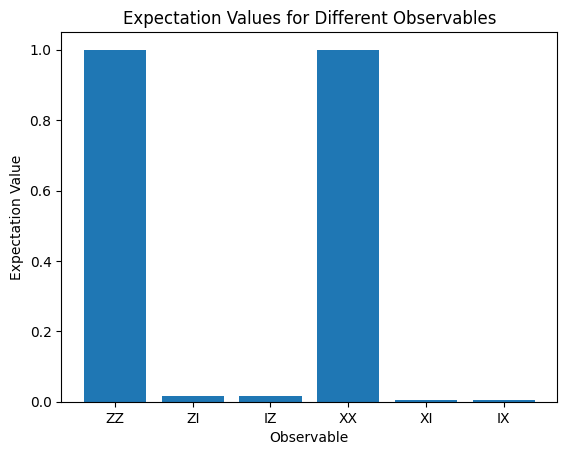

In [ ]:
#post processing and plotting

import matplotlib.pyplot as plt
data = ['ZZ','ZI','IZ','XX','XI','IX']
values = job.result().values
plt.bar(data, values)
plt.xlabel('Observable')
plt.ylabel('Expectation Value')
plt.title('Expectation Values for Different Observables')
plt.show()

In [ ]:
#extend the hello world in nqubit ghz state
#map the problem
def get_qc_for_n_qubit_GHZ_state(n):
  qc=QuantumCircuit(n)
  qc.h(0)
  for i in range(n-1):
    qc.cx(i,i+1)
  return qc
n=10
qc=get_qc_for_n_qubit_GHZ_state(n)
qc.draw()

┌───┐                                             
q_0: ┤ H ├──■──────────────────────────────────────────
     └───┘┌─┴─┐                                        
q_1: ─────┤ X ├──■─────────────────────────────────────
          └───┘┌─┴─┐                                   
q_2: ──────────┤ X ├──■────────────────────────────────
               └───┘┌─┴─┐                              
q_3: ───────────────┤ X ├──■───────────────────────────
                    └───┘┌─┴─┐                         
q_4: ────────────────────┤ X ├──■──────────────────────
                         └───┘┌─┴─┐                    
q_5: ─────────────────────────┤ X ├──■─────────────────
                              └───┘┌─┴─┐               
q_6: ──────────────────────────────┤ X ├──■────────────
                                   └───┘┌─┴─┐          
q_7: ───────────────────────────────────┤ X ├──■───────
                                        └───┘┌─┴─┐     
q_8: ────────────────────────────────────────┤ X ├──■──
                                             └───┘┌─┴─┐
q_9: ─────────────────────────────────────────────┤ X ├
                                                  └───┘

In [ ]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)]
print (operator_strings)
print (len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]


['ZZIIIIIIII', 'ZIZIIIIIII', 'ZIIZIIIIII', 'ZIIIZIIIII', 'ZIIIIZIIII', 'ZIIIIIZIII', 'ZIIIIIIZII', 'ZIIIIIIIZI', 'ZIIIIIIIIZ']
9


In [ ]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.6 MB/s eta 0:00:00


In [ ]:
#optimize the problem frm quantum execution
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = "ibm_brisbane"
backend = QiskitRuntimeService().get_backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

AccountNotFoundError: 'Unable to find account.'